In [1]:
import numpy as np
from bitalg.visualizer.main import Visualizer

# Generacja zbiorów punktów

<h2>Funkcje do generacji punktów</h2>

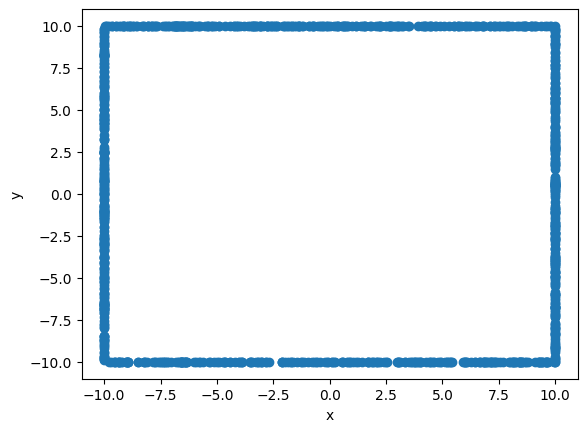

In [2]:
# Generate <amount> random points inside a rectangle of given corners
def randInRectangle(amount, corner1, corner2):
    xArray = np.random.uniform(corner1[0], corner2[0], amount)
    yArray = np.random.uniform(corner1[1], corner2[1], amount)
    pointsArray = [None for _ in len(amount)]
    for i in len(amount):
        pointsArray[i] = (xArray[i], yArray[i])
    return pointsArray

# Generate <amount> random points on a rectangle of given corners
def randOnRectangle(amount, corner1, corner2):
    lenSideX = abs(corner1[0] - corner2[0])
    lenSideY = abs(corner1[1] - corner2[1])
    lineCoordinates = np.random.uniform(0, 2*lenSideX + 2*lenSideY, amount)
    corners = [corner1, (corner1[0], corner2[1]), (corner2[0], corner1[1]), corner1]
    # Do generalizacji (jest 20 oba side lengthy xd)
    return [(corners[int(x)//20][0] + (int(x)//20 % 2) * (x%20), corners[int(x)//20][1] + ((int(x)//20 + 1) % 2) * (x%20)) for x in lineCoordinates]

vis = Visualizer()
vis.add_point(randOnRectangle(1000, (-10,-10), (10,10)))
vis.show()